In [83]:
import pandas as pd
import numpy as np

# Importing Data

In [84]:
df = pd.read_csv('S&P.csv')

In [85]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [86]:
df = df[-3652:] # considering last 20 years

In [87]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
20564,2009-11-19,1106.439941,1106.439941,1088.400024,1094.900024,1094.900024,4178030000
20565,2009-11-20,1094.660034,1094.660034,1086.810059,1091.380005,1091.380005,3751230000
20566,2009-11-23,1094.859985,1112.380005,1094.859985,1106.239990,1106.239990,3827920000
20567,2009-11-24,1105.829956,1107.560059,1097.630005,1105.650024,1105.650024,3700820000
20568,2009-11-25,1106.489990,1111.180054,1104.750000,1110.630005,1110.630005,3036350000
...,...,...,...,...,...,...,...
24211,2024-05-20,5305.350098,5325.319824,5302.399902,5308.129883,5308.129883,3420100000
24212,2024-05-21,5298.689941,5324.319824,5297.870117,5321.410156,5321.410156,3662240000
24213,2024-05-22,5319.279785,5323.180176,5286.009766,5307.009766,5307.009766,3847130000
24214,2024-05-23,5340.259766,5341.879883,5256.930176,5267.839844,5267.839844,3869520000


# Summary Statistics

In [88]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3.652000e+03
mean,2593.031937,2607.001898,2578.116903,2593.600000,2593.600000,3.942148e+09
std,1137.867697,1144.097329,1131.418780,1138.039252,1138.039252,9.559919e+08
min,1027.650024,1032.949951,1010.909973,1022.580017,1022.580017,1.025000e+09
25%,1651.777466,1658.972504,1644.495025,1652.342468,1652.342468,3.369995e+09
50%,2340.885009,2350.149903,2325.599976,2341.890014,2341.890014,3.788830e+09
75%,3436.587463,3450.592529,3413.682434,3432.350036,3432.350036,4.309638e+09
max,5340.259766,5341.879883,5302.399902,5321.410156,5321.410156,1.061781e+10


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 20564 to 24215
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3652 non-null   object 
 1   Open       3652 non-null   float64
 2   High       3652 non-null   float64
 3   Low        3652 non-null   float64
 4   Close      3652 non-null   float64
 5   Adj Close  3652 non-null   float64
 6   Volume     3652 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.8+ KB


In [90]:
df['Date'] = pd.to_datetime(df['Date'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 20564 to 24215
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3652 non-null   datetime64[ns]
 1   Open       3652 non-null   float64       
 2   High       3652 non-null   float64       
 3   Low        3652 non-null   float64       
 4   Close      3652 non-null   float64       
 5   Adj Close  3652 non-null   float64       
 6   Volume     3652 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 199.8 KB


# Data Visualisation

In [92]:
import matplotlib.pyplot as plt

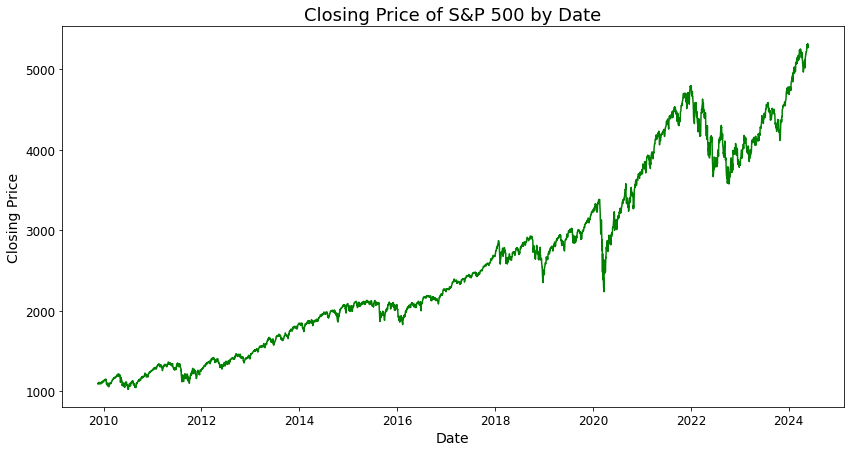

In [93]:
fig, ax = plt.subplots(1,1, figsize=(14, 7))
ax.plot(df['Date'], df['Close'], c='g')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Closing Price', fontsize=14)
ax.set_title('Closing Price of S&P 500 by Date', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Creating Sequences

In [94]:
def create_sequences(data, n_steps, n_future):
    X = []
    y = []
    for i in range(len(data) - n_steps - n_future + 1):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps: i+n_steps+n_future])
    return np.array(X), np.array(y)

In [95]:
# checking if our function works

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
n_steps = 3
n_future = 2

# here we're expecting the following

# X = [[1, 2, 3],       y = [[4, 5],
#      [2, 3, 4],            [5, 6],
#      [3, 4, 5]...]         [6, 7]...]

In [96]:
create_sequences(arr, n_steps, n_future) # great it works

(array([[ 1,  2,  3],
        [ 2,  3,  4],
        [ 3,  4,  5],
        [ 4,  5,  6],
        [ 5,  6,  7],
        [ 6,  7,  8],
        [ 7,  8,  9],
        [ 8,  9, 10],
        [ 9, 10, 11],
        [10, 11, 12],
        [11, 12, 13]]),
 array([[ 4,  5],
        [ 5,  6],
        [ 6,  7],
        [ 7,  8],
        [ 8,  9],
        [ 9, 10],
        [10, 11],
        [11, 12],
        [12, 13],
        [13, 14],
        [14, 15]]))

In [97]:
X, y = create_sequences(df['Close'], 10, 1) # here we want to look back 4 years which is 1461 days and predict 1 year.

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [100]:
X = X.reshape(X.shape[0], X.shape[1], 1)
y = y.reshape(y.shape[0], y.shape[1], 1) # Reshape appropriately for LSTM model

In [101]:
X.shape, y.shape, df['Date'].shape

((3642, 10, 1), (3642, 1, 1), (3652,))

# Creating Training, Test and Validation Sets

In [102]:
q_90 = int(len(X) * 0.9)
q_80 = int(len(X) * 0.8)

In [103]:
dates_train, dates_test, X_train, X_test = df['Date'][:q_80], df['Date'][q_90:-10], X[:q_80], X[q_90:]
y_train, y_test = y[:q_80], y[q_90:]

In [104]:
dates_val, X_val, y_val = df['Date'][q_80:q_90], X[q_80:q_90], y[q_80:q_90]

In [105]:
dates_test.shape

(365,)

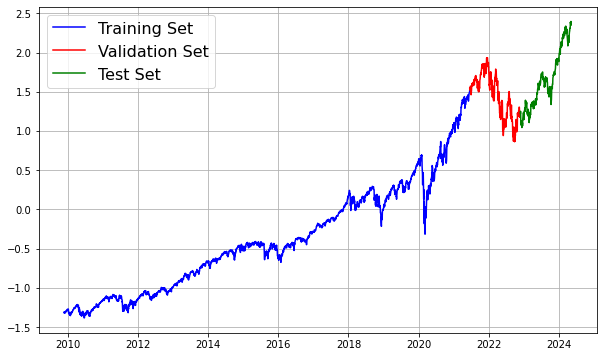

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_train[:,0], label='Training Set', c='b')
plt.plot(dates_val, y_val[:,0], label = 'Validation Set', c='r')
plt.plot(dates_test, y_test[:,0], label = 'Test Set', c='g')
plt.legend(fontsize=16)
plt.grid()
plt.show()

# Creating the LSTM Model

In [107]:
import tensorflow as tf
from tensorflow import keras

In [108]:
model = keras.models.Sequential([
    keras.layers.LSTM(50, return_sequences = True, input_shape=[None, 1]),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [109]:
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])

In [110]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
92/92 [==============================] - 5s 19ms/step - loss: 0.1449 - mean_absolute_error: 0.2661 - val_loss: 0.2265 - val_mean_absolute_error: 0.3182
Epoch 2/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0197 - mean_absolute_error: 0.0869 - val_loss: 0.0810 - val_mean_absolute_error: 0.1755
Epoch 3/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0510 - val_loss: 0.0451 - val_mean_absolute_error: 0.1377
Epoch 4/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0377 - val_loss: 0.0316 - val_mean_absolute_error: 0.1184
Epoch 5/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0343 - val_loss: 0.0235 - val_mean_absolute_error: 0.1074
Epoch 6/200
92/92 [==============================] - 1s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0353 - val_loss: 0.0242 - val_mean_absolute_error: 0.1198
Epoch 7/200
92/92 [==

92/92 [==============================] - 1s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0300 - val_loss: 0.0158 - val_mean_absolute_error: 0.0960
Epoch 52/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0333 - val_loss: 0.0186 - val_mean_absolute_error: 0.1047
Epoch 53/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0319 - val_loss: 0.0121 - val_mean_absolute_error: 0.0880
Epoch 54/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0306 - val_loss: 0.0123 - val_mean_absolute_error: 0.0824
Epoch 55/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0310 - val_loss: 0.0132 - val_mean_absolute_error: 0.0938
Epoch 56/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0302 - val_loss: 0.0114 - val_mean_absolute_error: 0.0825
Epoch 57/200
92/92 [=========

92/92 [==============================] - 1s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0334 - val_loss: 0.0141 - val_mean_absolute_error: 0.0979
Epoch 102/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0313 - val_loss: 0.0128 - val_mean_absolute_error: 0.0846
Epoch 103/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0307 - val_loss: 0.0115 - val_mean_absolute_error: 0.0831
Epoch 104/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0306 - val_loss: 0.0117 - val_mean_absolute_error: 0.0811
Epoch 105/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0313 - val_loss: 0.0113 - val_mean_absolute_error: 0.0812
Epoch 106/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0294 - val_loss: 0.0114 - val_mean_absolute_error: 0.0826
Epoch 107/200
92/92 [===

Epoch 151/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0305 - val_loss: 0.0116 - val_mean_absolute_error: 0.0810
Epoch 152/200
92/92 [==============================] - 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0295 - val_loss: 0.0115 - val_mean_absolute_error: 0.0834
Epoch 153/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0298 - val_loss: 0.0122 - val_mean_absolute_error: 0.0879
Epoch 154/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0293 - val_loss: 0.0120 - val_mean_absolute_error: 0.0815
Epoch 155/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0298 - val_loss: 0.0121 - val_mean_absolute_error: 0.0876
Epoch 156/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0311 - val_loss: 0.0178 - val_mean_absolute_error: 0.1013
Epoch 157/

In [111]:
df = pd.DataFrame(history.history)
df

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.144881,0.266087,0.226487,0.318174
1,0.019729,0.086866,0.080991,0.175528
2,0.006685,0.051024,0.045140,0.137676
3,0.003776,0.037674,0.031583,0.118387
4,0.003070,0.034288,0.023537,0.107409
...,...,...,...,...
195,0.002239,0.029877,0.011442,0.081256
196,0.002246,0.029725,0.013857,0.087251
197,0.002262,0.030182,0.011449,0.081098
198,0.002197,0.029093,0.011567,0.081249


In [112]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

12/12 [==============================] - 0s 3ms/step


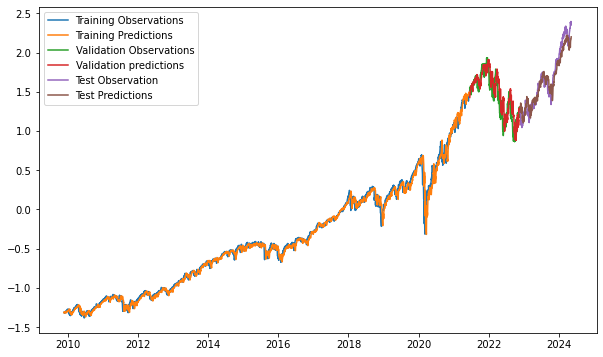

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_train[:,0], label = 'Training Observations')
plt.plot(dates_train, train_preds[:,0], label = 'Training Predictions')
plt.plot(dates_val, y_val[:,0], label = 'Validation Observations')
plt.plot(dates_val, val_preds[:,0], label = 'Validation predictions')
plt.plot(dates_test, y_test[:,0], label = 'Test Observation')
plt.plot(dates_test, test_preds[:,0], label = 'Test Predictions')
plt.legend()

<AxesSubplot:>

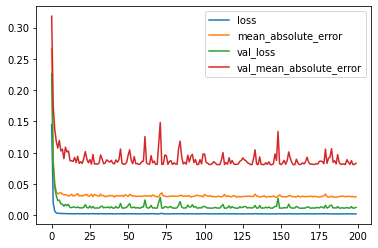

In [114]:
df.plot()

In [115]:
gpus = tf.config.list_physical_devices('GPU')
print("GPUs Available:", gpus)

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [116]:
tf.__version__

'2.10.1'

In [117]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1
